In [1]:
source("../../utils.R")
library(Seurat)

Attaching SeuratObject

‘SeuratObject’ was built under R 4.3.3 but the current version is
4.4.0; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%




In [15]:
sobj <- readRDS("../../silhouette_real_life_examples/Atlas2_ArchR_tiles_ndim15.RDS")

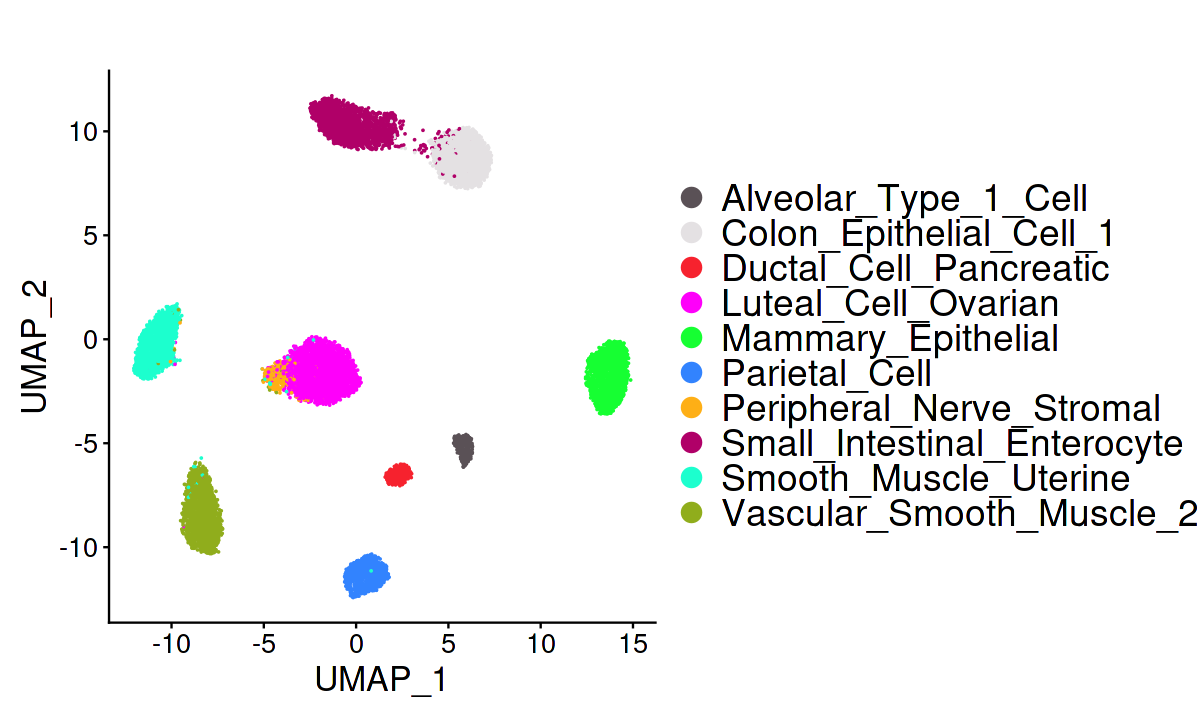

In [56]:
options(repr.plot.width=10, repr.plot.height=6)
p1 <- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome", pt.size=0.001)  +
    theme(plot.title = element_text(face = "bold", size=24), 
        text=element_text(size=20), 
        legend.text = element_text(size = 22),
        axis.text = element_text(size = 16)) + ggtitle("") +
guides(color = guide_legend(override.aes = list(size = 5)))

p1

In [19]:
embed <- sobj@reductions[["learned_embedding"]]@cell.embeddings

In [20]:
dist.euclidean <- cal_distance(embed, metric="Euclidean")
res_euclidean <- silhouette_result(dist.euclidean, sobj$ground_truth)

In [22]:
dist.cosine <- cal_distance(embed, metric="cosine")
res_cosine <- silhouette_result(dist.cosine, sobj$ground_truth)

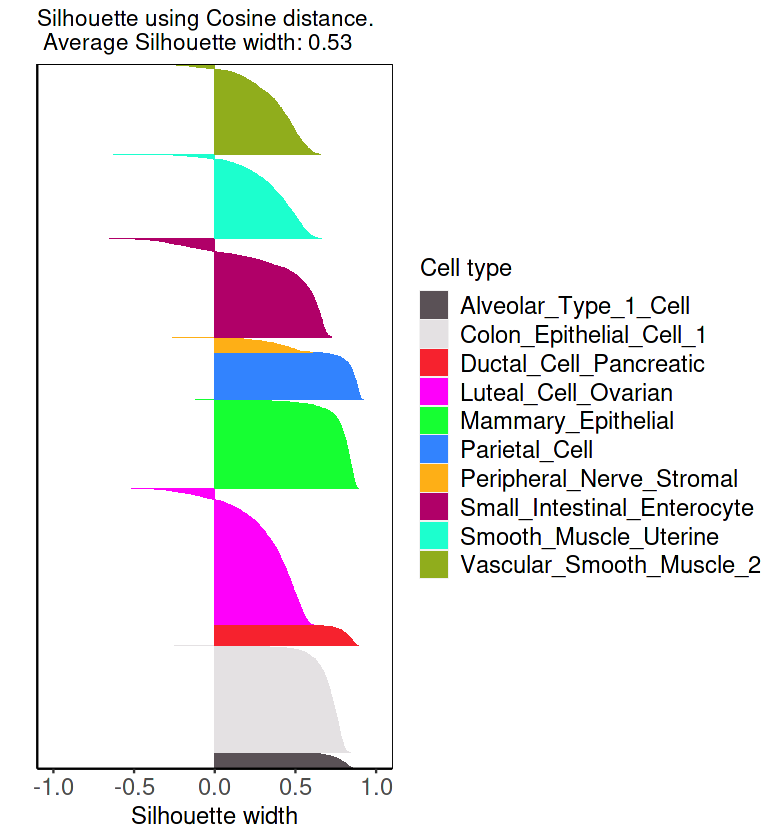

In [66]:
options(repr.plot.width=6.5, repr.plot.height=7)
df_res <- as.data.frame(res_cosine$sil)
df_res$labels <- as.factor(sobj$ground_truth)
df_res <- df_res[order(df_res[,"cluster"], -df_res$sil_width), ]
df_res$name <- as.factor(1:nrow(df_res))
df_res$cluster <- as.factor(df_res$cluster)

p2 <- ggplot(df_res, aes(x=sil_width, y=name, fill=labels)) + 
    geom_bar(stat = "identity") +
    labs(x = "Silhouette width", y = "",
         fill = "Cell type",
         title = paste0("Silhouette using Cosine distance.",
                        "\n Average Silhouette width: ", 
                        round(mean(df_res$sil_width), 2))) + 
    # theme_bw() +
    theme(axis.text.y = element_blank(), 
          axis.ticks.y = element_blank(),
          panel.background = element_blank(),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          panel.border = element_rect(colour = "black", fill=NA, size=0.2),
          axis.text.x = element_text(size = 14),  
          axis.title.x = element_text(size = 14),  
          legend.text = element_text(size = 14),  
          legend.title = element_text(size = 14)) +
    scale_fill_manual(values = my_col_polychrome) +
    scale_color_manual(values = my_col_polychrome) +
    xlim(-1,1)
p2                  

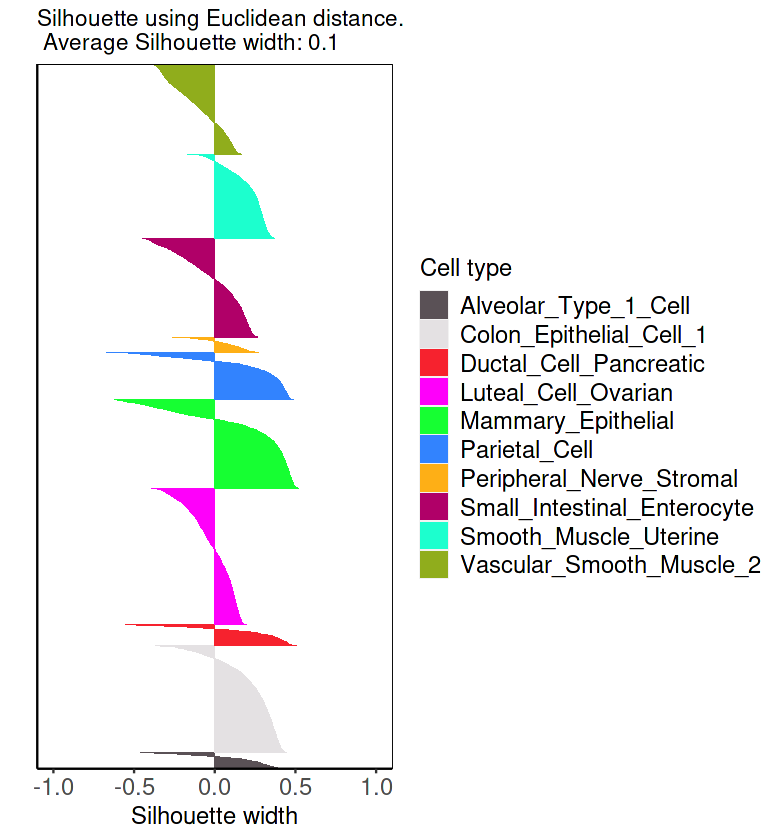

In [67]:
options(repr.plot.width=6.5, repr.plot.height=7)
df_res <- as.data.frame(res_euclidean$sil)
df_res$labels <- as.factor(sobj$ground_truth)
df_res <- df_res[order(df_res[,"cluster"], -df_res$sil_width), ]
df_res$name <- as.factor(1:nrow(df_res))
df_res$cluster <- as.factor(df_res$cluster)

p3 <- ggplot(df_res, aes(x=sil_width, y=name, fill=labels)) + 
    geom_bar(stat = "identity") +
    labs(x = "Silhouette width", y = "",
         fill = "Cell type",
         title = paste0("Silhouette using Euclidean distance.",
                        "\n Average Silhouette width: ", 
                        round(mean(df_res$sil_width), 2))) + 
    # theme_bw() +
    theme(axis.text.y = element_blank(), 
          axis.ticks.y = element_blank(),
          panel.background = element_blank(),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          panel.border = element_rect(colour = "black", fill=NA, size=0.2),
          axis.text.x = element_text(size = 14),  
          axis.title.x = element_text(size = 14),  
          legend.text = element_text(size = 14),  
          legend.title = element_text(size = 14)) +
    scale_fill_manual(values = my_col_polychrome) +
    scale_color_manual(values = my_col_polychrome) +
    xlim(-1,1)
p3                  

In [57]:
pdf("ArchR_tiles_Atlas2_UMAP.pdf", width=10, height=6)
plot(p1)
dev.off() 

png 
  2

In [68]:
pdf("ArchR_tiles_Atlas2_Silhouette_cosine.pdf", width=6.5, height=7)
plot(p2)
dev.off() 

png 
  2

In [69]:
pdf("ArchR_tiles_Atlas2_Silhouette_euclidean.pdf", width=6.5, height=7)
plot(p3)
dev.off() 

png 
  2